In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../input/adult-census-income/adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [5]:
def fun_view():
    ''' This Function will return the columns names as index,null_value_count,any unique character we specify & its percentage of occurance per column.'''
    
    null_values = df.apply(lambda x:x.isnull().sum())
    
    blank_char = df.apply(lambda x:x.isin(['?']).sum())
    
    percent_blank_char = df.apply(lambda x:round((x.isin(['?']).sum()/df.shape[0])*100, 2))
    
    unique_values = df.apply(lambda x:len(x.unique()))
    
    return pd.DataFrame({'null_values':null_values,
                         '? Values':blank_char,'% ? Values':percent_blank_char
                        ,'unique_values':unique_values})

print('Function Information',fun_view.__doc__)
view = fun_view()
display(view)


Function Information  This Function will return the columns names as index,null_value_count,any unique character we specify & its percentage of occurance per column.


,null_values,? Values,% ? Values,unique_values
age,0,0,0.00,73
workclass,0,1836,5.64,9
fnlwgt,0,0,0.00,21648
education,0,0,0.00,16
education.num,0,0,0.00,16
marital.status,0,0,0.00,7
occupation,0,1843,5.66,15
relationship,0,0,0.00,6
race,0,0,0.00,5
sex,0,0,0.00,2


In [6]:
df[df == '?'] = np.nan
df.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [8]:
for i in ['workclass','occupation','native.country']:
    print(df[i].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica

In [9]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native.country'] = df['native.country'].fillna(df['native.country'].mode()[0])

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [11]:
df.duplicated().sum()

24

In [12]:
df = df.drop_duplicates(keep = 'first')
df.shape

(32537, 15)

In [13]:
df.income.value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

In [14]:
df['income'] = df['income'].replace({'<=50K':0, '>50K':1})
df.income.value_counts()

0    24698
1     7839
Name: income, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
age               32537 non-null int64
workclass         32537 non-null object
fnlwgt            32537 non-null int64
education         32537 non-null object
education.num     32537 non-null int64
marital.status    32537 non-null object
occupation        32537 non-null object
relationship      32537 non-null object
race              32537 non-null object
sex               32537 non-null object
capital.gain      32537 non-null int64
capital.loss      32537 non-null int64
hours.per.week    32537 non-null int64
native.country    32537 non-null object
income            32537 non-null int64
dtypes: int64(7), object(8)
memory usage: 4.0+ MB


In [16]:
categorical_features = df.select_dtypes(object)
numerical_features = df.select_dtypes(exclude=object)

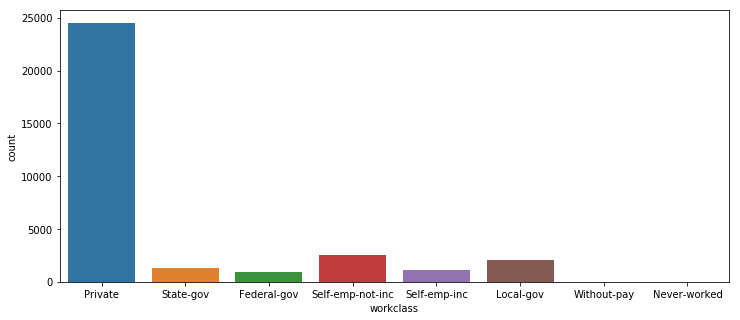

In [17]:
fig = plt.figure(figsize=(12,5))
sns.countplot(df['workclass'])

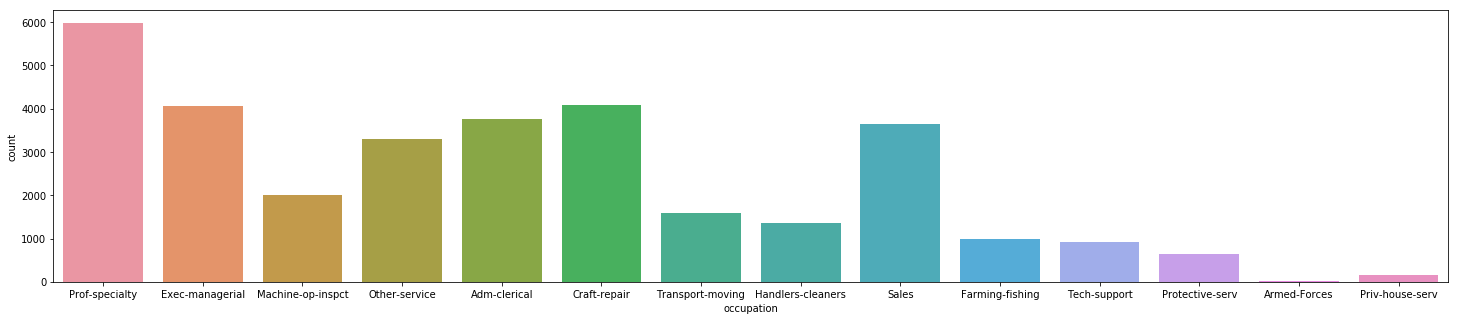

In [18]:
fig = plt.figure(figsize=(25,5))
sns.countplot(df['occupation'])

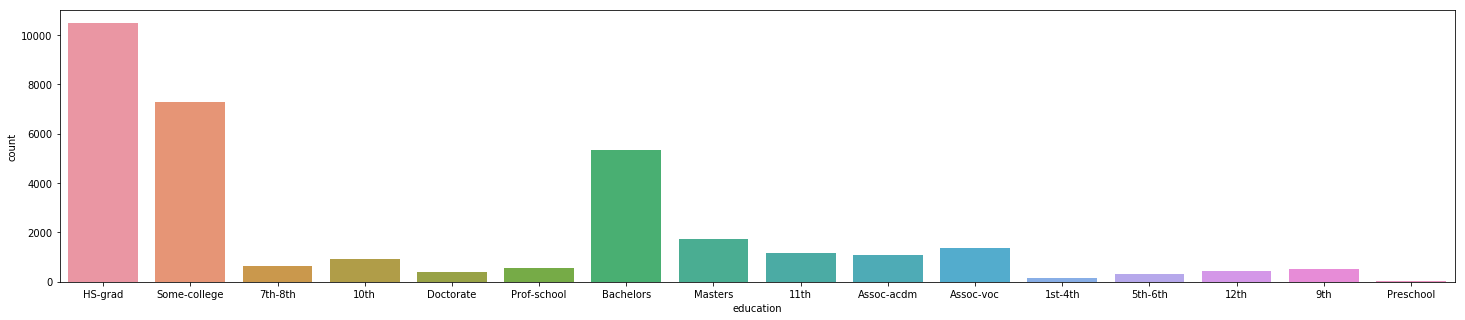

In [19]:
fig = plt.figure(figsize=(25,5))
sns.countplot(df['education'])

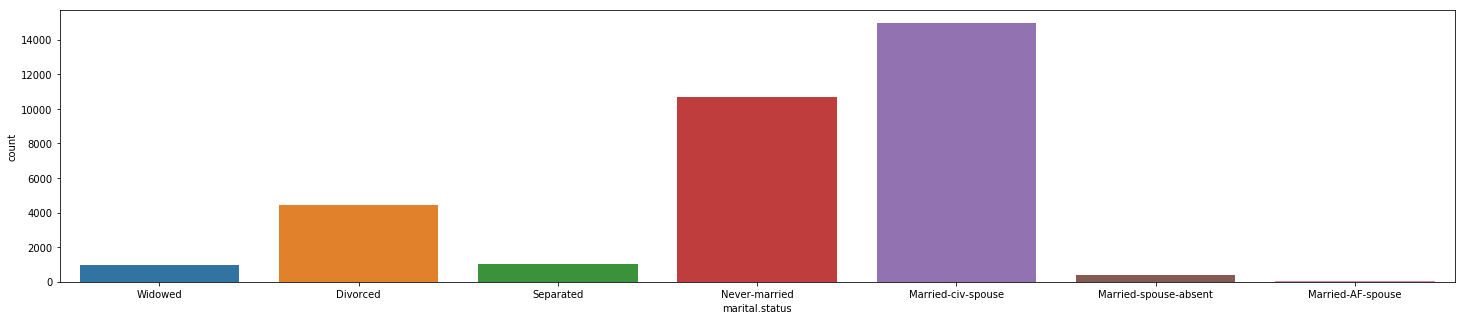

In [20]:
fig = plt.figure(figsize=(25,5))
sns.countplot(df['marital.status'])

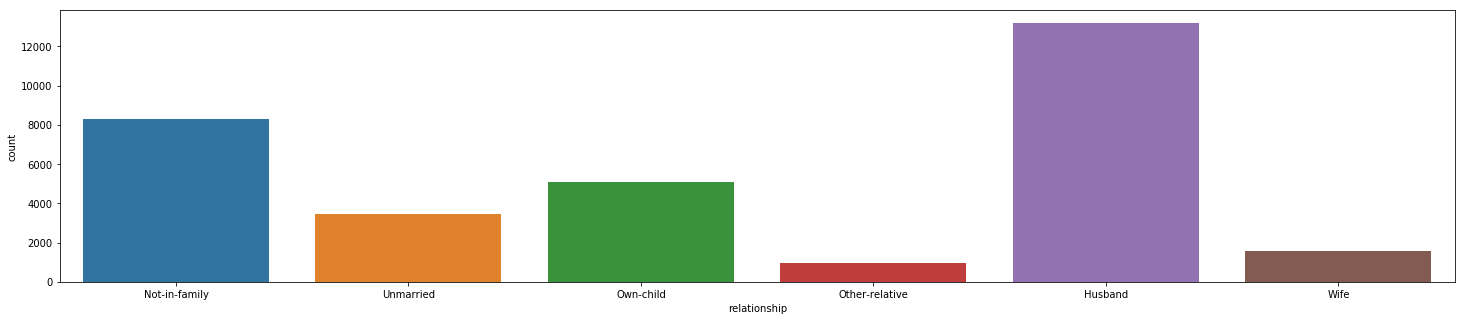

In [21]:
fig = plt.figure(figsize=(25,5))
sns.countplot(df['relationship'])

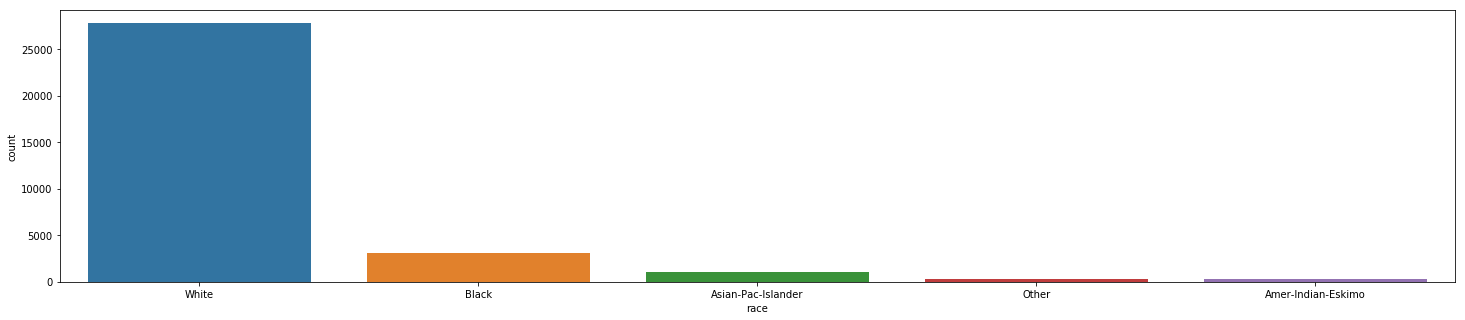

In [22]:
fig = plt.figure(figsize=(25,5))
sns.countplot(df['race'])

In [23]:
df['native.country'].value_counts().head()

United-States    29735
Mexico             639
Philippines        198
Germany            137
Canada             121
Name: native.country, dtype: int64

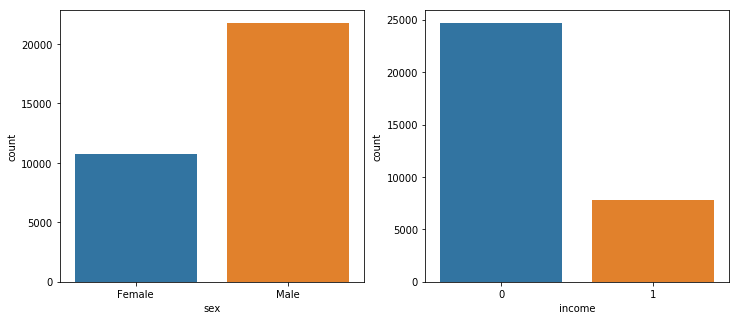

In [24]:
fig, ax = plt.subplots(1,2,figsize=(12,5))
sns.countplot(df['sex'], ax = ax[0])
sns.countplot(df['income'], ax = ax[1])

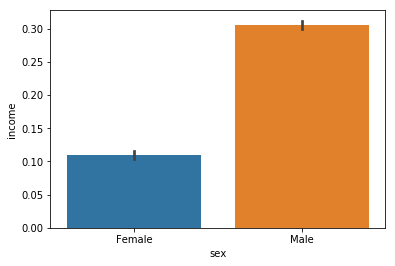

In [25]:
sns.barplot(df['sex'], df['income'])

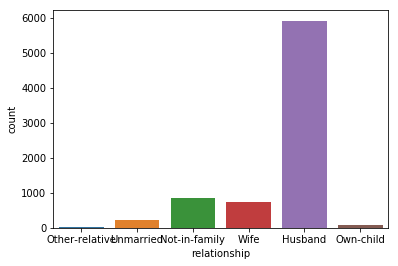

In [26]:
a = df[df['income'] == 1]
sns.countplot(a['relationship'])

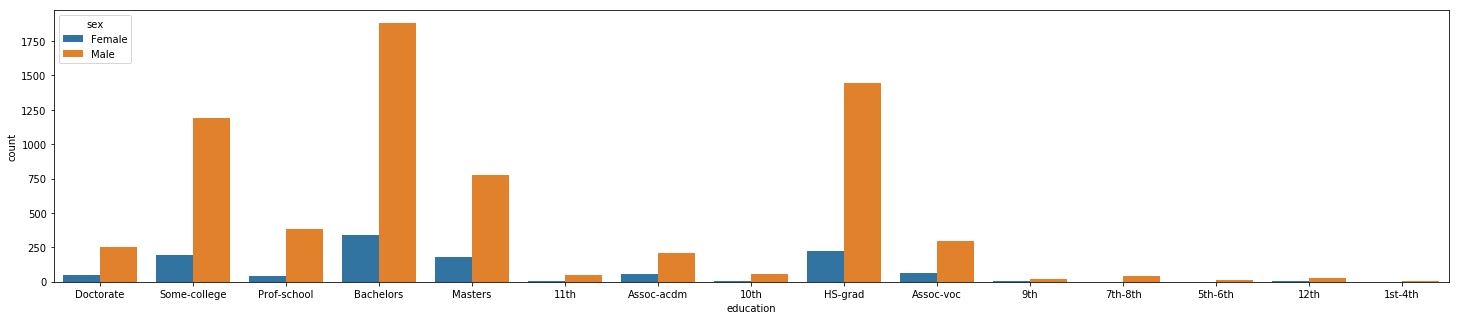

In [27]:
fig = plt.figure(figsize=(25,5))
sns.countplot(a['education'], hue = a['sex'])

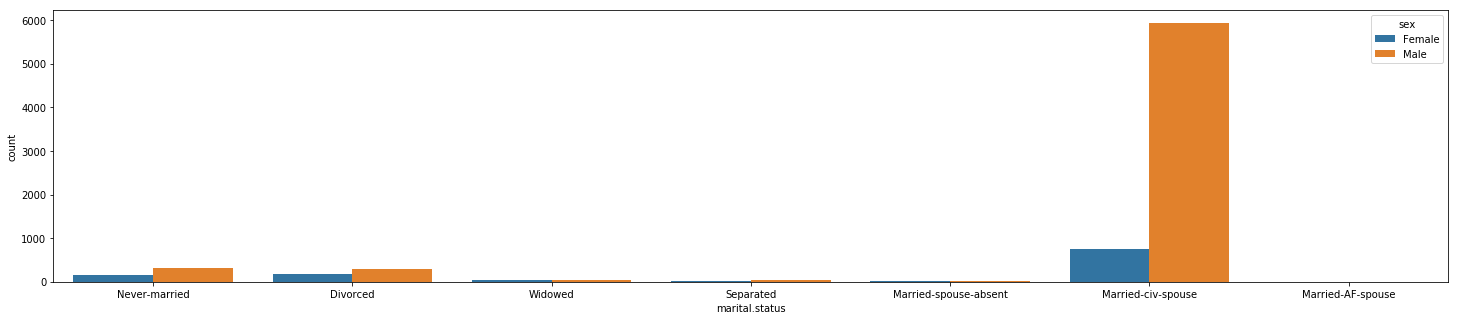

In [28]:
fig = plt.figure(figsize=(25,5))
sns.countplot(a['marital.status'], hue = a['sex'])

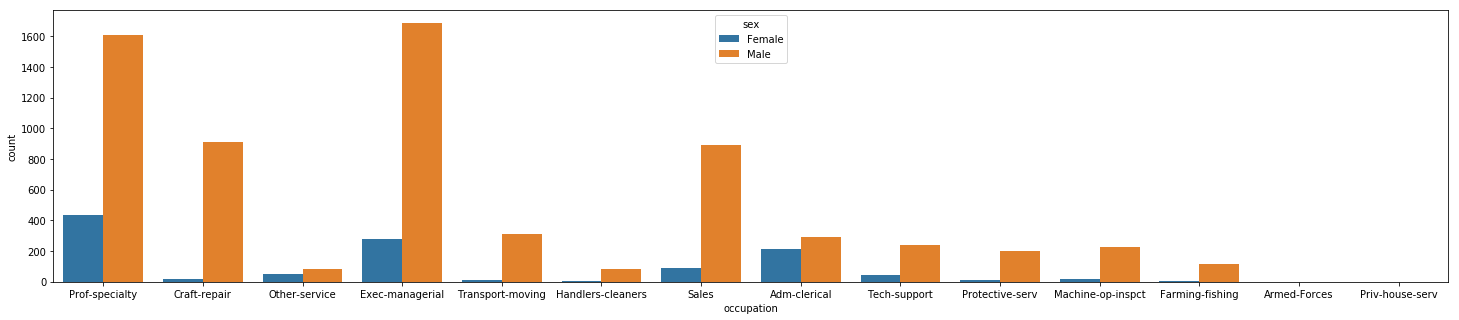

In [29]:
fig = plt.figure(figsize=(25,5))
sns.countplot(a['occupation'], hue = a['sex'])

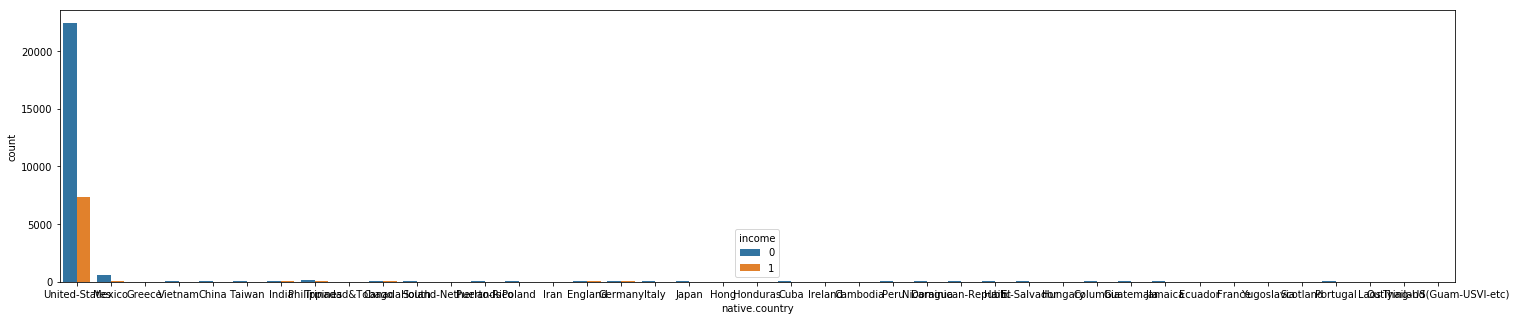

In [30]:
fig = plt.figure(figsize=(25,5))
sns.countplot(df['native.country'], hue = df['income'])

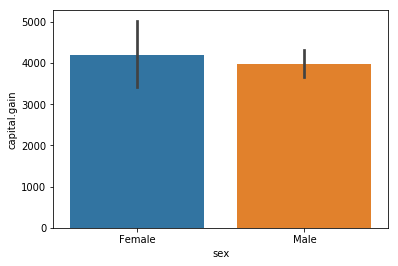

In [31]:
sns.barplot(a['sex'], a['capital.gain'])

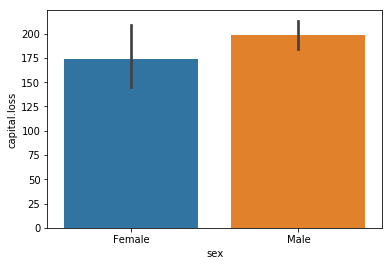

In [32]:
sns.barplot(a['sex'], a['capital.loss'])

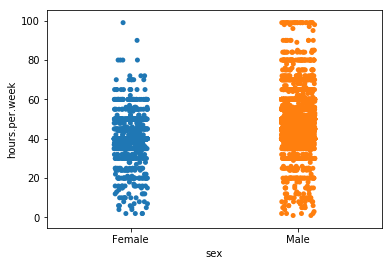

In [33]:
sns.stripplot(a['sex'],a['hours.per.week'])

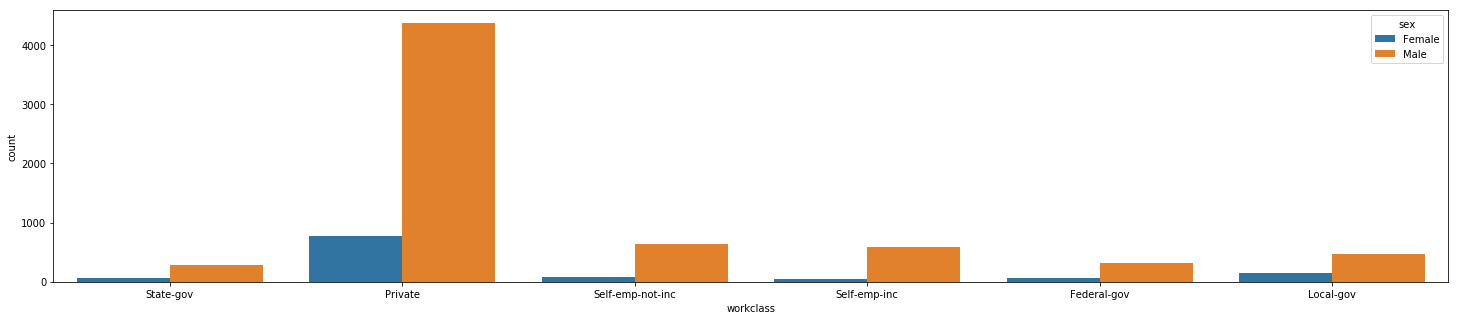

In [34]:
fig = plt.figure(figsize=(25,5))
sns.countplot(a['workclass'], hue = a['sex'])

In [35]:
b = df[df['income'] == 0]

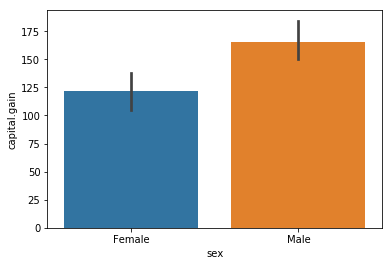

In [36]:
sns.barplot(b['sex'], b['capital.gain'])

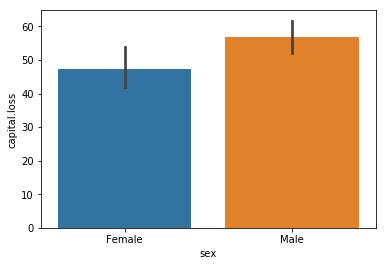

In [37]:
sns.barplot(b['sex'], b['capital.loss'])

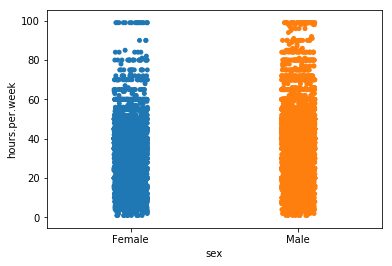

In [38]:
sns.stripplot(b['sex'],b['hours.per.week'])

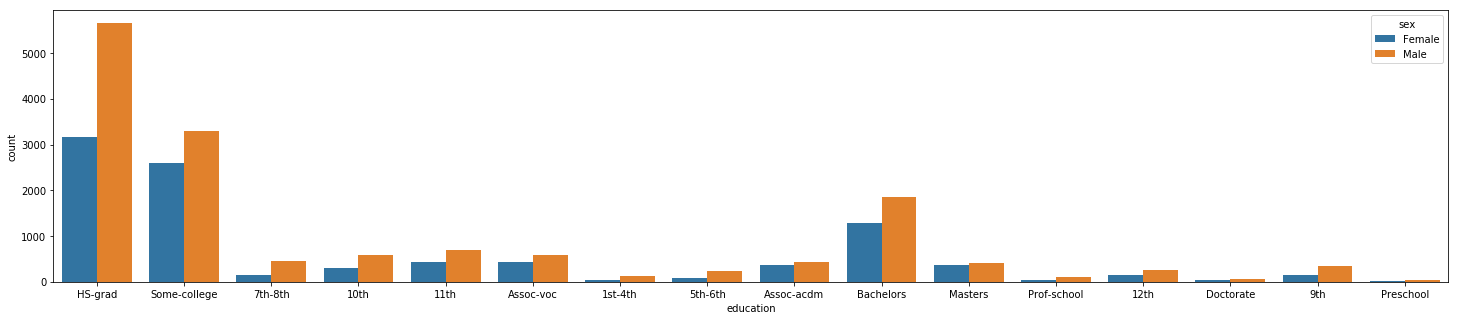

In [39]:
fig = plt.figure(figsize=(25,5))
sns.countplot(b['education'], hue = b['sex'])

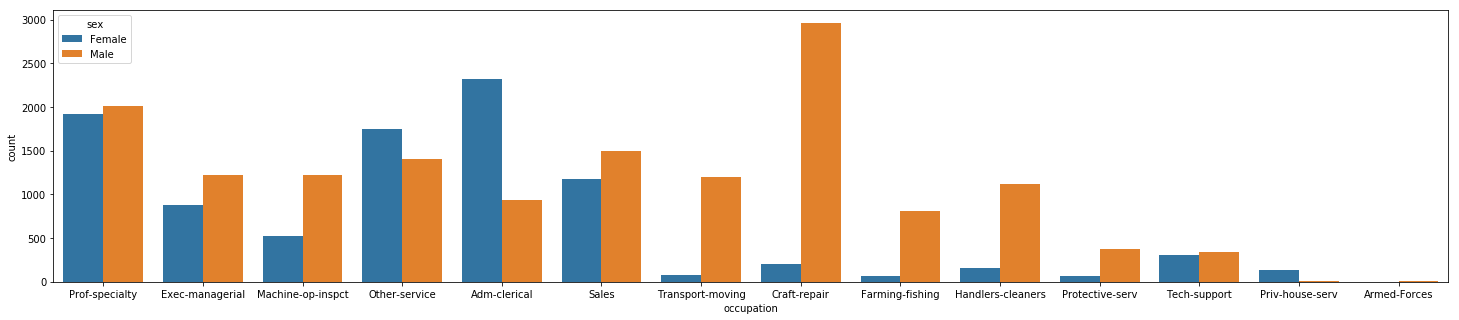

In [40]:
fig = plt.figure(figsize=(25,5))
sns.countplot(b['occupation'], hue = b['sex'])

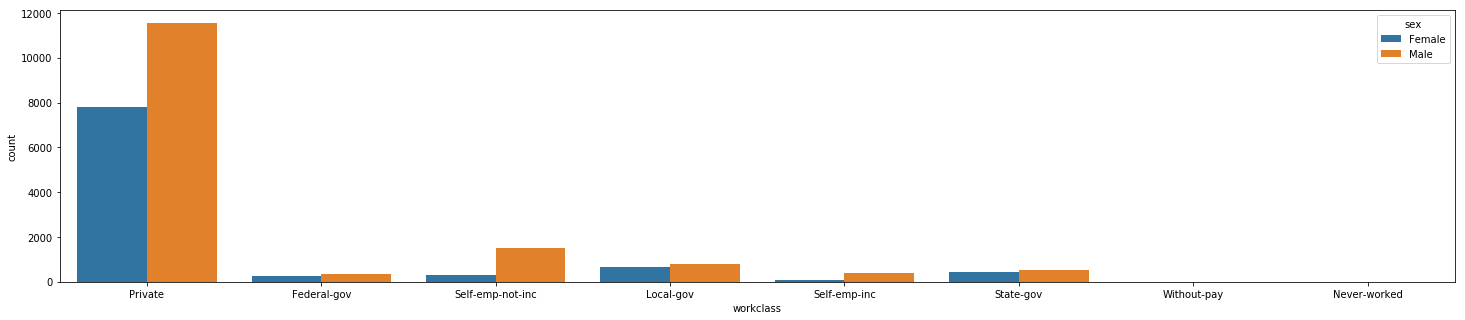

In [41]:
fig = plt.figure(figsize=(25,5))
sns.countplot(b['workclass'], hue = b['sex'])

In [42]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [43]:
categorical_features.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country'],
      dtype='object')

In [44]:
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital.status'] = le.fit_transform(df['marital.status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['native.country'] = le.fit_transform(df['native.country'])

In [45]:
x = df.drop('income', axis = 1)
y = df['income']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [46]:
from imblearn.over_sampling import SMOTE
s=SMOTE()
xtrain_reset,ytrain_reset=s.fit_sample(x_train,y_train)
xtest_reset,ytest_reset=s.fit_sample(x_test,y_test)
print(sum(ytrain_reset==1))
print(sum(ytrain_reset==0))

Using TensorFlow backend.


17373
17373


In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [48]:
x_train = pd.DataFrame(sc.fit_transform(x_train), columns= x.columns)
x_test = pd.DataFrame(sc.transform(x_test), columns= x.columns)

In [49]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
y_pred = lor.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score, classification_report, cohen_kappa_score, confusion_matrix

In [52]:
print(accuracy_score(y_test, y_pred))

0.8266748617086662


In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7325
           1       0.74      0.47      0.58      2437

    accuracy                           0.83      9762
   macro avg       0.79      0.71      0.73      9762
weighted avg       0.82      0.83      0.81      9762



In [54]:
print(confusion_matrix(y_test, y_pred))

[[6916  409]
 [1283 1154]]


In [55]:
print(cohen_kappa_score(y_test, y_pred))

0.4744722690830634
